# Importacion de bibliotecas

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from itertools import zip_longest
from tabulate import tabulate
import pdfkit
import seaborn as sns
from itertools import zip_longest
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import sklearn.neighbors as neighbors
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.ensemble as ensemble
import xgboost
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.features import (JointPlotVisualizer,)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

*Se ha dicho que es más fácil tomar una PYME y capacitarla en ciencia de datos que al revés. No estoy seguro de estar de acuerdo con eso.100%, pero es cierto que los datos tienen matices y una PYME puede ayudar a separar eso. Entendiendo el negocio y el datos, son capaces de crear mejores modelos y tener una mejor impacto en sus negocios. Antes de crear un modelo, haré un análisis de datos exploratorio. Esto me da una idea de los datos, pero también es una gran excusa para Reunirse y discutir problemas con las unidades de negocios que controlan eso.fecha.*

# Importacion de los datos

In [136]:
# Ruta completa al archivo CSV
file_path = 'C:/Users/felip/OneDrive/Documentos/Python/Codigos/Ciencia_Datos/Datos_titanic_CSV/titanic3.csv'
# Importar la base de datos
df = pd.read_csv(file_path)
X= df
# Puedes imprimir el DataFrame si lo deseas
# print(df)

# Tamanho de la importacion de los datos

In [137]:
X.shape

(1309, 14)

# Tipo de estructura de datos

In [138]:
X.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

# Estadística resumida

*Podemos usar pandas para obtener estadísticas resumidas de nuestros datos.El método .describe también nos dará el recuento de no NaN.valores. Veamos los resultados de la primera y la última columna:*

In [139]:
#luego seleccionar solo la primera y la última columna de esas estadísticas.
#X.describe().iloc[:, [0, -1]]
#Descripcion de todos los datos 
X.describe().iloc[:, :]


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Histograma

*Un histograma es una gran herramienta para visualizar datos numéricos. Puede ver cuántos modos hay y ver la distribución. La biblioteca pandas tiene un método .plot para mostrar histogramas:*

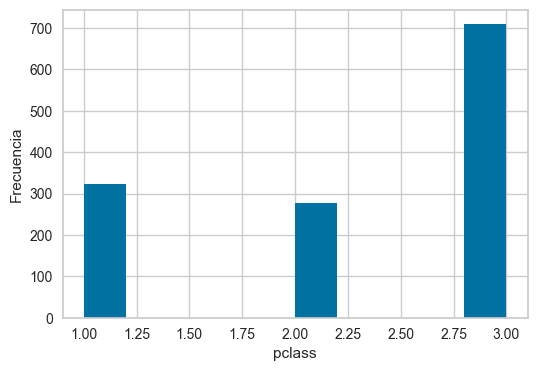

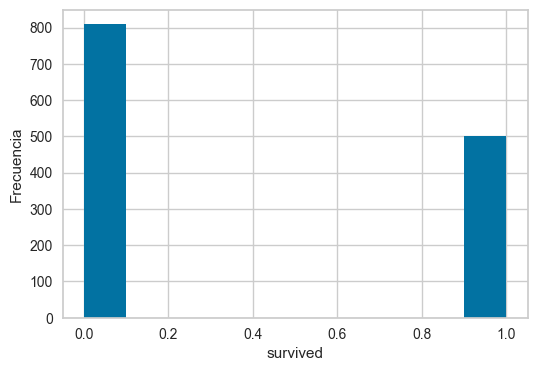

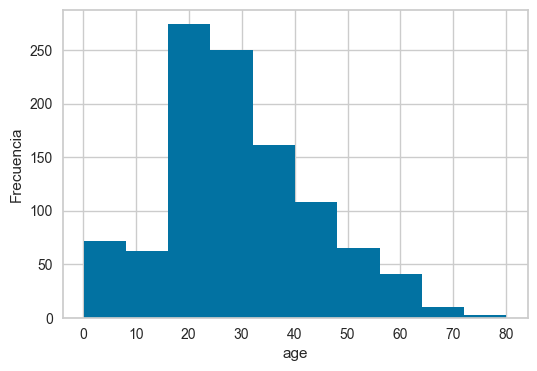

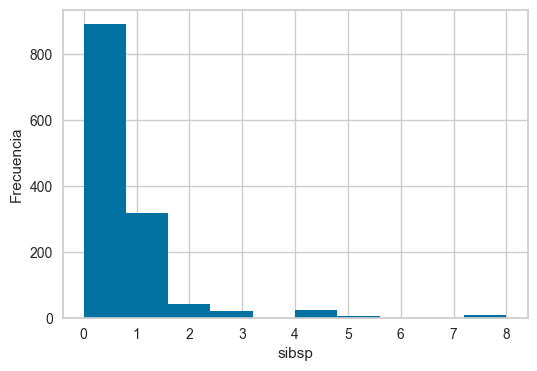

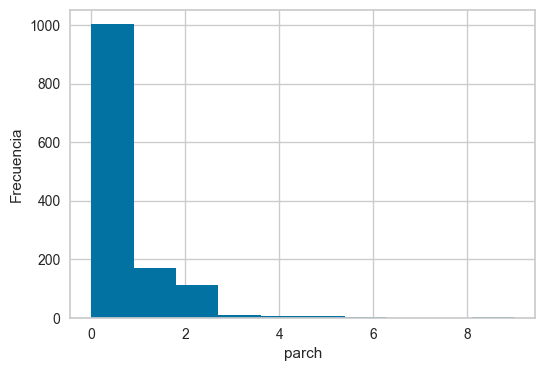

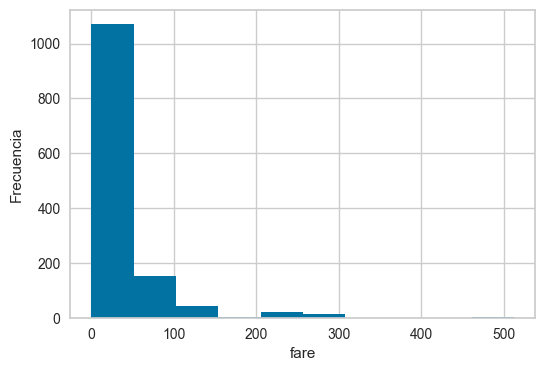

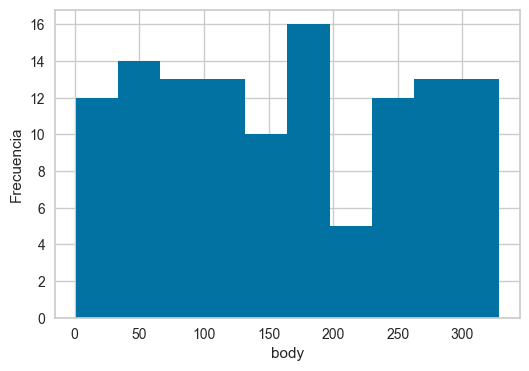

In [140]:
import os

image_dir = "images"
os.makedirs(image_dir, exist_ok=True)

columnas=['pclass','survived','age','sibsp','parch','fare','body']

for columna in columnas:
    fig, ax = plt.subplots(figsize=(6, 4))
    X[columna].plot(kind="hist", ax=ax)
    # Agregar etiquetas a los ejes X e Y
    ax.set_xlabel(columna)
    ax.set_ylabel("Frecuencia")
    plt.show()


# Limpieza y separacion de datos para acondicionamiento

In [141]:
def tweak_titanic(df):
    df = df.drop(columns=[
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin"
    ]).pipe(pd.get_dummies, drop_first=True)
    return df

ti_df = tweak_titanic(df)
#print(ti_df)
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    #Obtencion del conjunto de prueba y entreanamiento
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare"]
    #Imputacion de los valores faltantes 
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.transform(X_test[num_cols])
    #Estandarizacion de los valores 
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, "survived", std_cols=std_cols)

# HIstograma

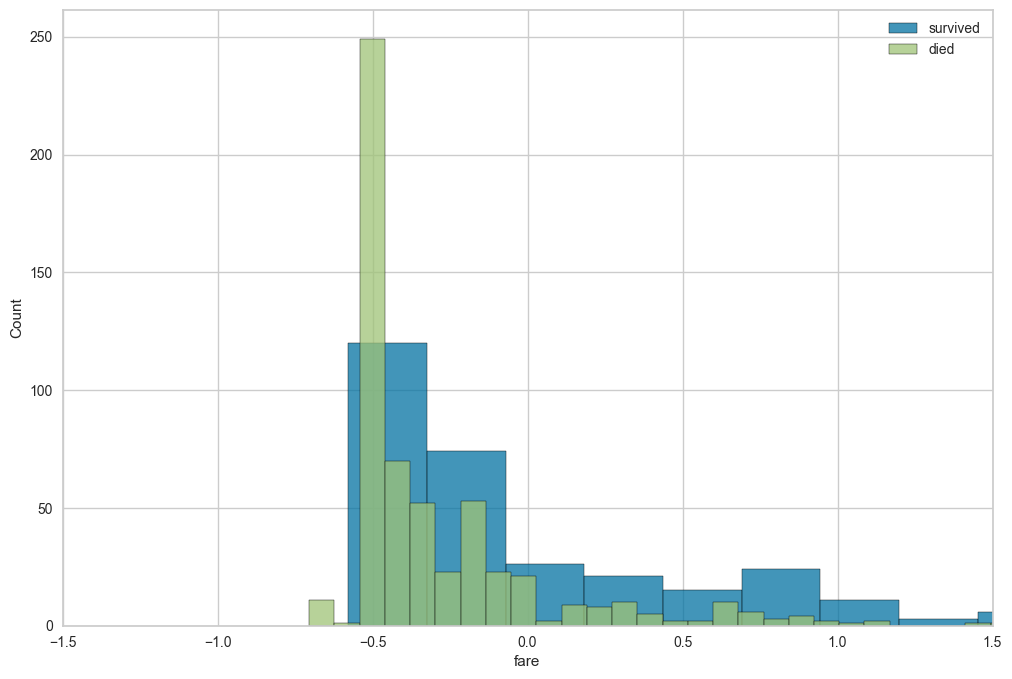

Estadísticas descriptivas para la clase 'survived':
count    331.000000
mean       0.348789
std        1.378606
min       -0.577640
25%       -0.414870
50%       -0.145246
75%        0.473908
max        9.066014
Name: fare, dtype: float64

Estadísticas descriptivas para la clase 'died':
count    585.000000
mean      -0.197349
std        0.621760
min       -0.704308
25%       -0.488461
50%       -0.403782
75%       -0.145246
max        4.343624
Name: fare, dtype: float64


In [142]:
# Crear una figura y ejes utilizando Seaborn
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una máscara para seleccionar las instancias donde 'y_train' es igual a 1 (survived)
mask = y_train == 1

# Utilizar Seaborn para trazar la distribución de 'fare' para la clase 'survived'
sns.histplot(X_train[mask].fare, label='survived', ax=ax)

# Utilizar Seaborn para trazar la distribución de 'fare' para la clase 'died'
sns.histplot(X_train[~mask].fare, label='died', ax=ax)

# Establecer límites en el eje x
ax.set_xlim(-1.5, 1.5)

# Agregar una leyenda para distinguir entre las dos clases
ax.legend()

# Mostrar la figura
plt.show()

# Obtener estadísticas descriptivas para la clase 'survived'
stats_survived = X_train[mask].fare.describe()
print("Estadísticas descriptivas para la clase 'survived':")
print(stats_survived)

# Obtener estadísticas descriptivas para la clase 'died'
stats_died = X_train[~mask].fare.describe()
print("\nEstadísticas descriptivas para la clase 'died':")
print(stats_died)


# Gráfico de dispersión

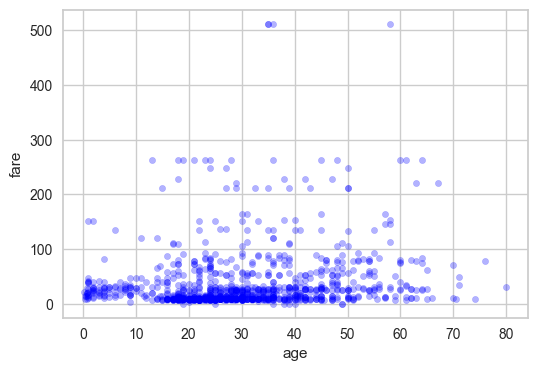

0.17873985599964104

In [143]:
fig, ax = plt.subplots(figsize=(6, 4))

# Especificar el color de los puntos en el gráfico
color = 'blue'

# Crear el gráfico de dispersión especificando el color
X.plot.scatter(x="age", y="fare", ax=ax, alpha=0.3, color=color)

# Mostrar el gráfico
plt.show()

#Muestra la correlacion entre las dos variables 
X.age.corr(X.fare)


# Diferentes combinaciones de graficos de dispersion

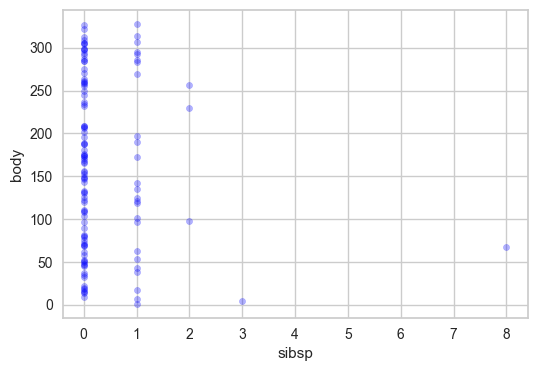

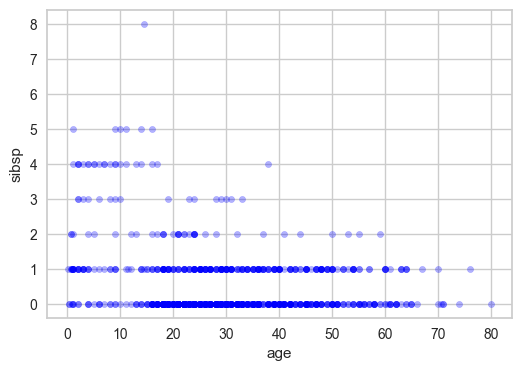

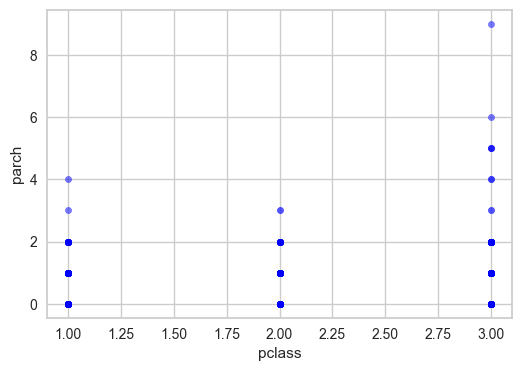

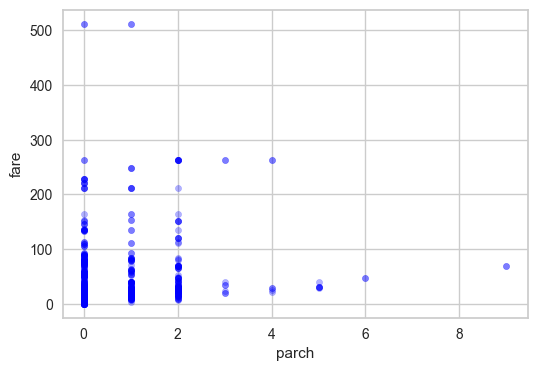

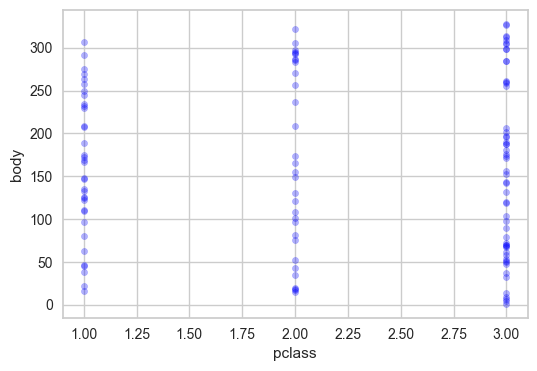

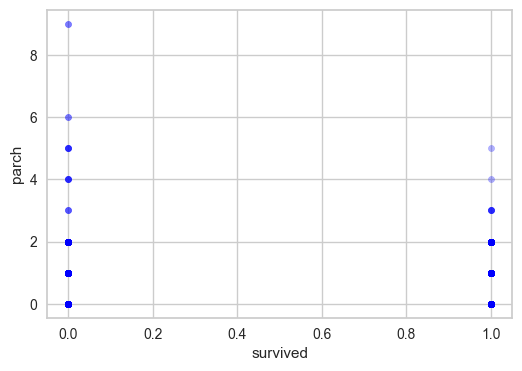

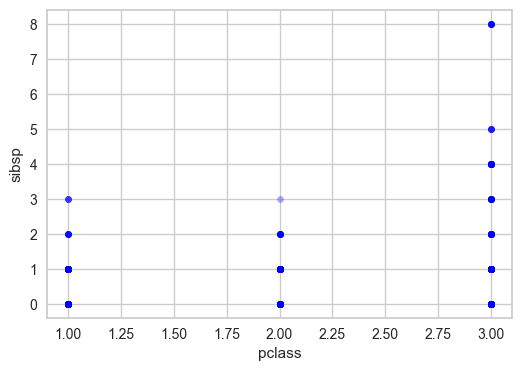

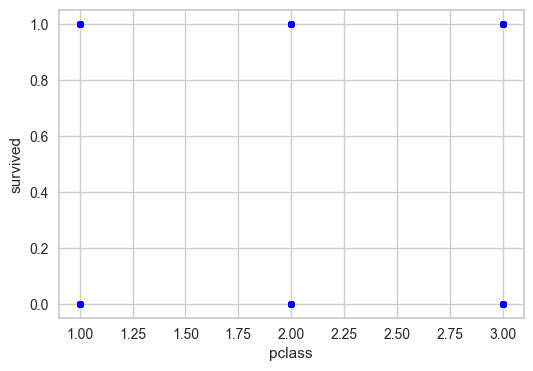

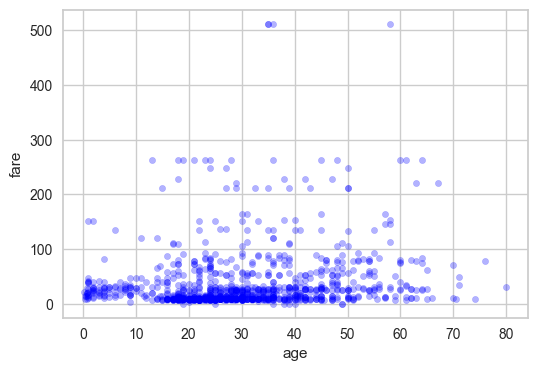

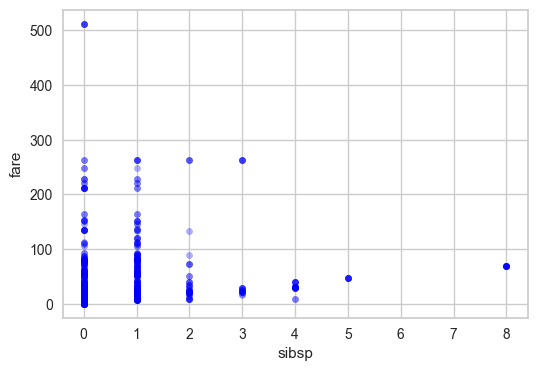

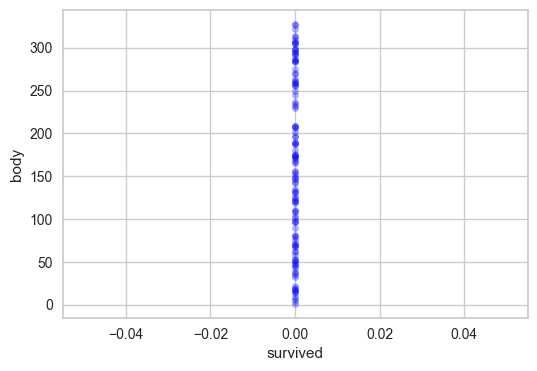

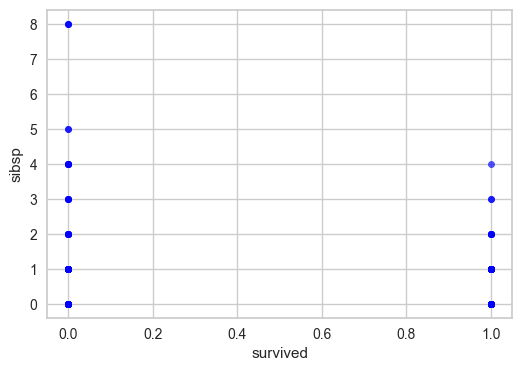

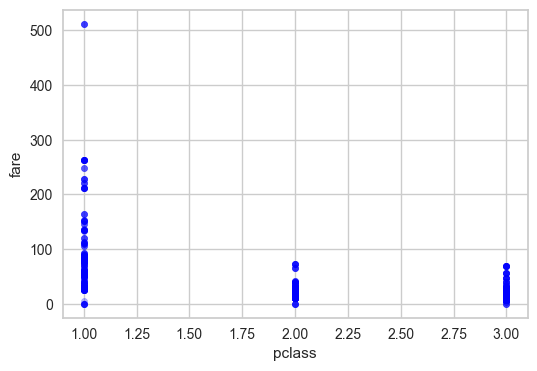

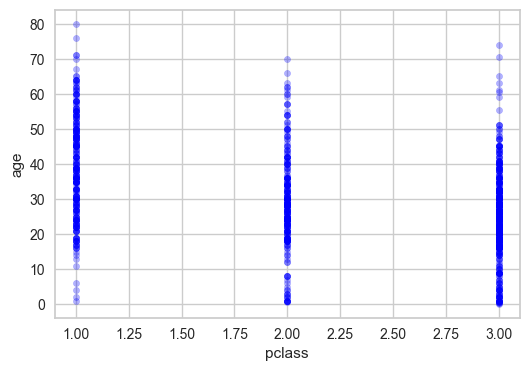

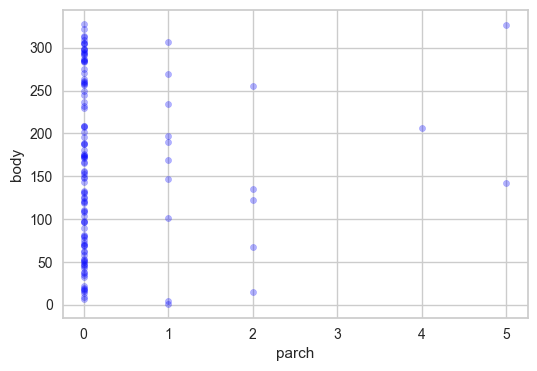

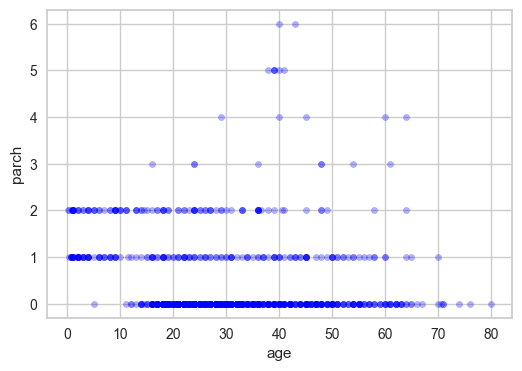

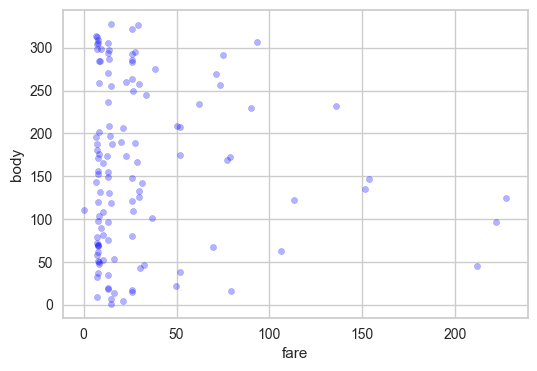

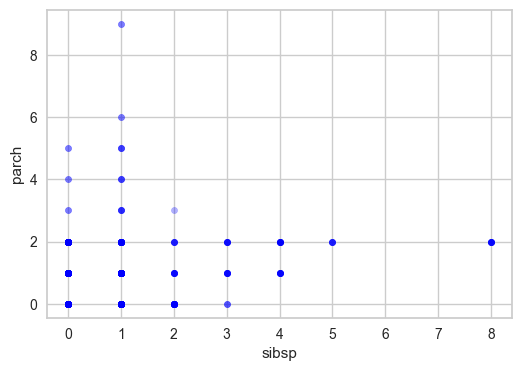

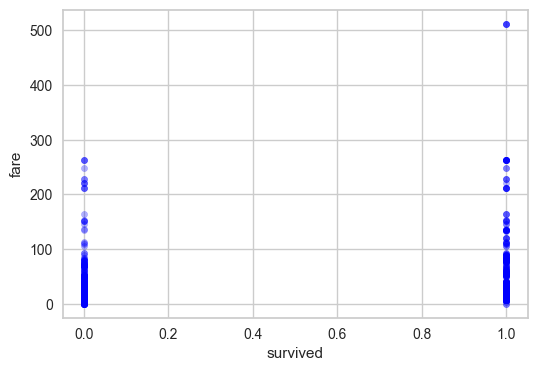

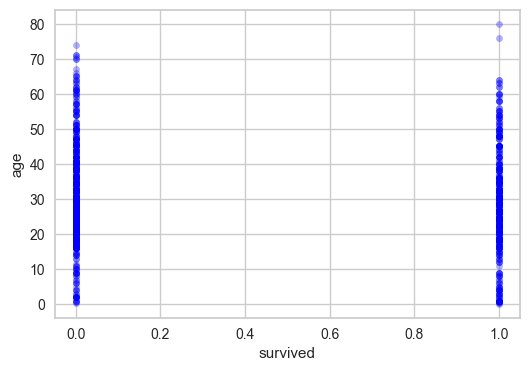

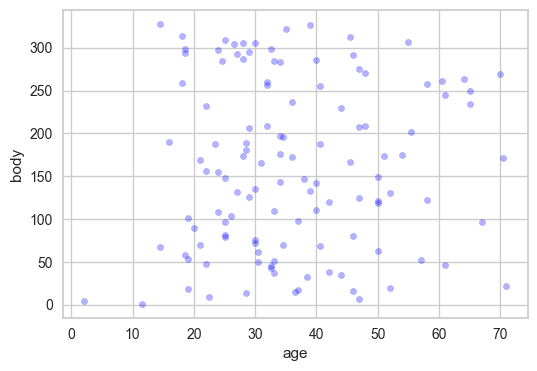

In [144]:
from itertools import combinations

columnas = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

# Obtener todas las combinaciones posibles de tuplas (evitando combinaciones consigo mismas)
combinaciones = set(combinations(columnas, 2))

# Iterar sobre las combinaciones y graficar cada par
for (i, k) in combinaciones:
    fig, ax = plt.subplots(figsize=(6, 4))
    # Especificar el color de los puntos en el gráfico
    color = 'blue'
    # Crear el gráfico de dispersión especificando el color
    X[[i, k]].plot.scatter(x=i, y=k, ax=ax, alpha=0.3, color=color)
    # Mostrar el gráfico
    plt.show()

   

#

# Joint Plot in Python

*Sitio con la informacion "https://www.javatpoint.com/joint-plot-in-python#:~:text=The%20joint%20plot%20is%20a,relationship%20between%20x%20and%20y."*

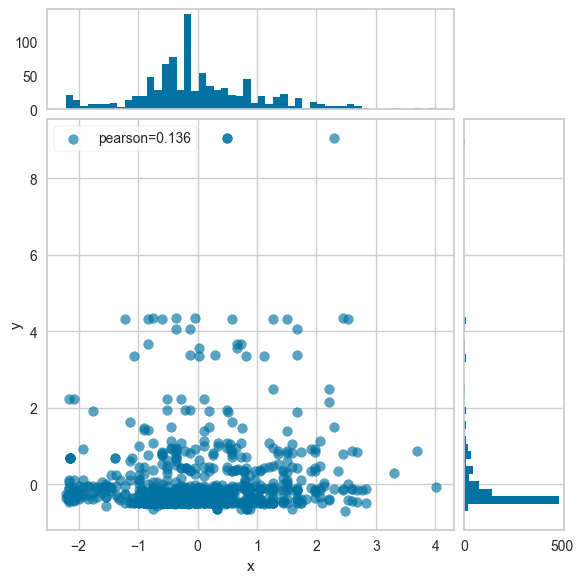

<Axes: xlabel='x', ylabel='y'>

In [145]:
from yellowbrick.features import (JointPlotVisualizer,)

fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(feature='age',target='fare')
jpv.fit(X_train['age'], X_train['fare'])
jpv.poof()


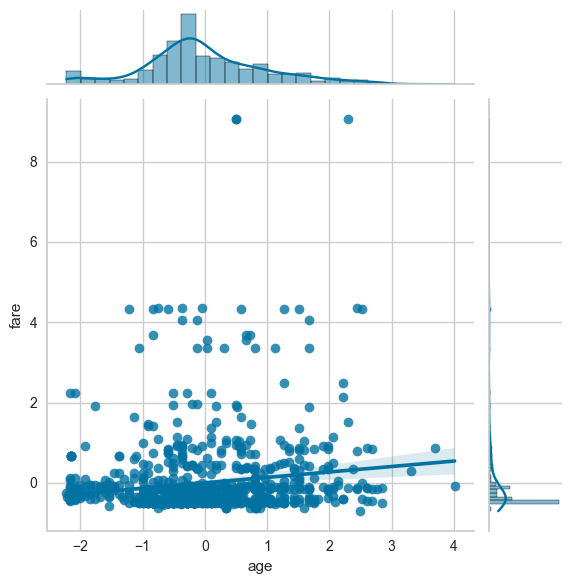

In [146]:
new_df = X_train.copy()
new_df['target'] = y_train
# Use jointplot for scatter plot with regression line
sns.jointplot(x="age", y="fare", data=new_df, kind="reg")
plt.show()

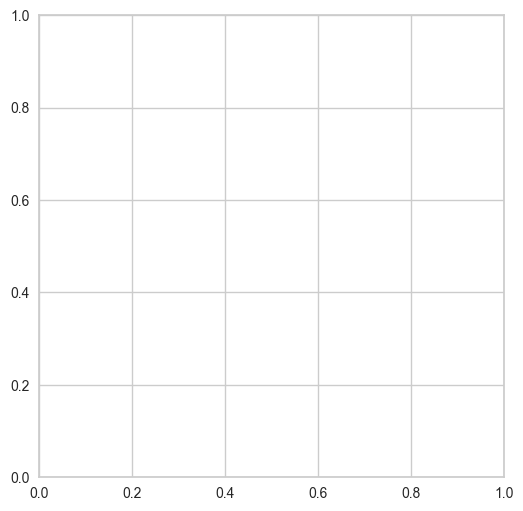

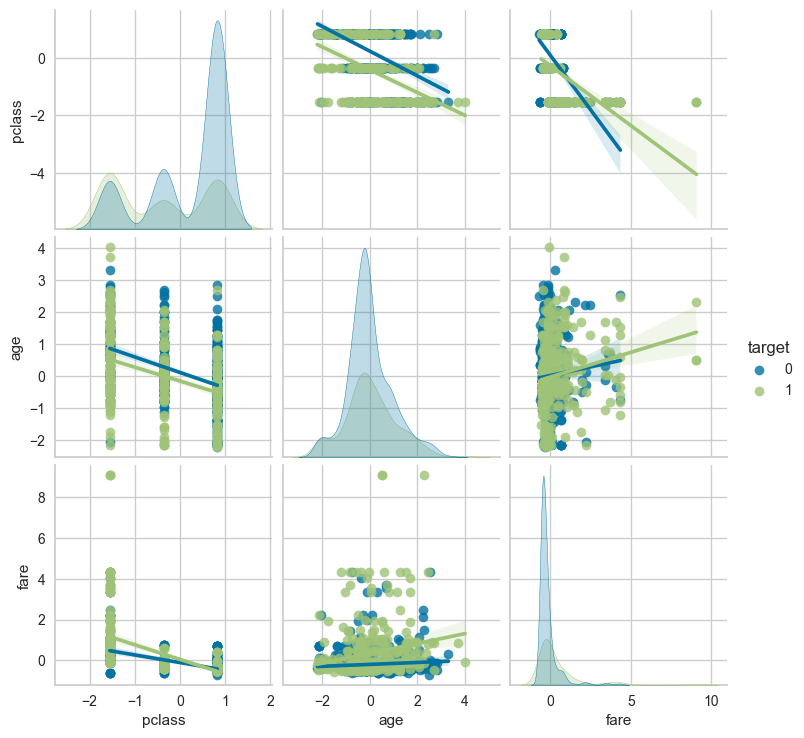

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df = X_train.copy()
new_df['target'] = y_train  
vars = ["pclass", "age", "fare"]
fig, ax = plt.subplots(figsize=(6, 6))
p = sns.pairplot(new_df, vars=vars, hue="target", kind="reg")

# Box and Violin Plots

<Axes: xlabel='target', ylabel='age'>

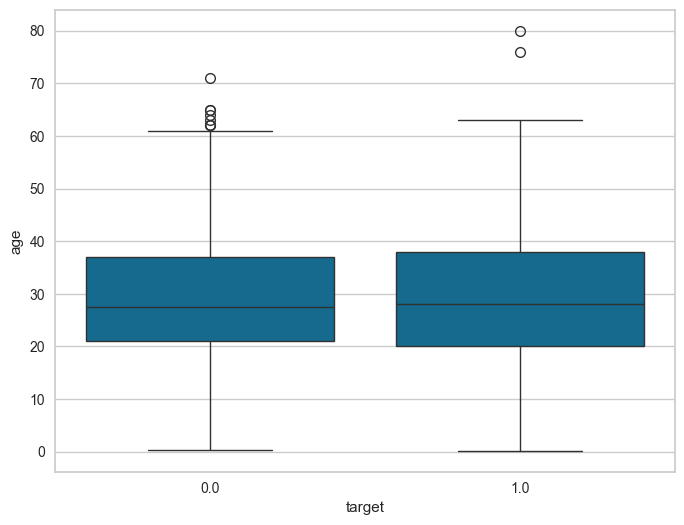

In [148]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df['target'] = y_train  
boxplot(x="target", y="age", data=new_df)

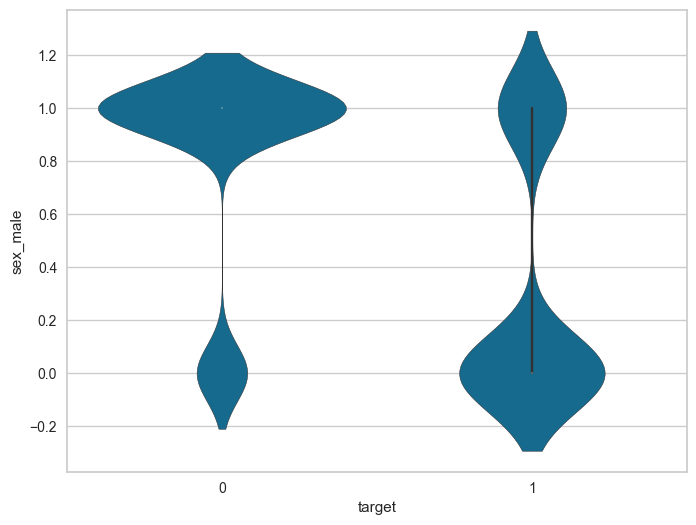

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with columns 'sex_male' and 'target'
# If not, replace X with your actual data
new_df = X_train.copy()
new_df['target'] = y_train

fig, ax = plt.subplots(figsize=(8, 6))

# Use violinplot with x as the target variable and y as 'sex_male'
sns.violinplot(x="target", y="sex_male", data=new_df)

plt.show()


# Comparing Two Ordinal Values

*Aquí está el código pandas para comparar dos categorías ordinales. Soy simulando eso agrupando la edad en diez cuantiles y pclass en tres contenedores. La trama está normalizada para que llene toda la vertical. área. Esto hace fácil ver que en el cuantil del 40% la mayoría de los billetes eran de 3ª clase (ver Figura 6-9):*

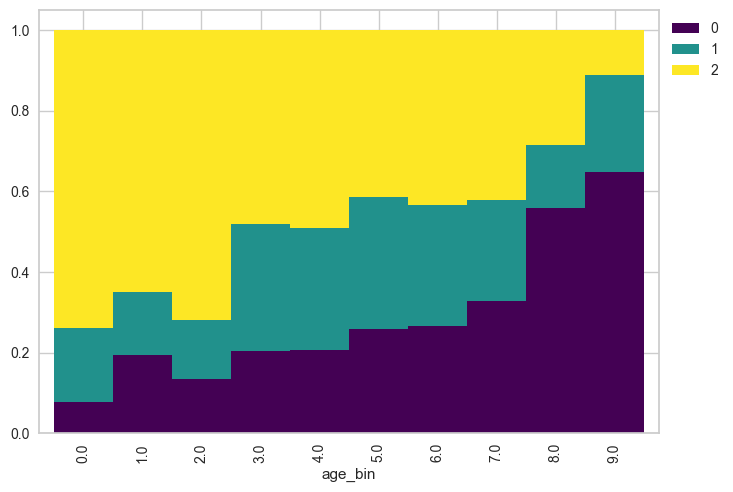

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que X sea tu DataFrame con las columnas 'age' y 'pclass'
# Si no, reemplaza X con tus datos reales.

(X_train.assign(
    age_bin=pd.qcut(X.age, q=10, labels=False),
    class_bin=pd.cut(X.pclass, bins=3, labels=False),
)
.groupby(["age_bin", "class_bin"])
.size()
.unstack()
.pipe(lambda df: df.div(df.sum(1), axis=0))
.plot.bar(
    stacked=True,
    width=1,
    cmap="viridis",
))

# Coloca la leyenda en la esquina superior derecha del gráfico
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


# Correlacion

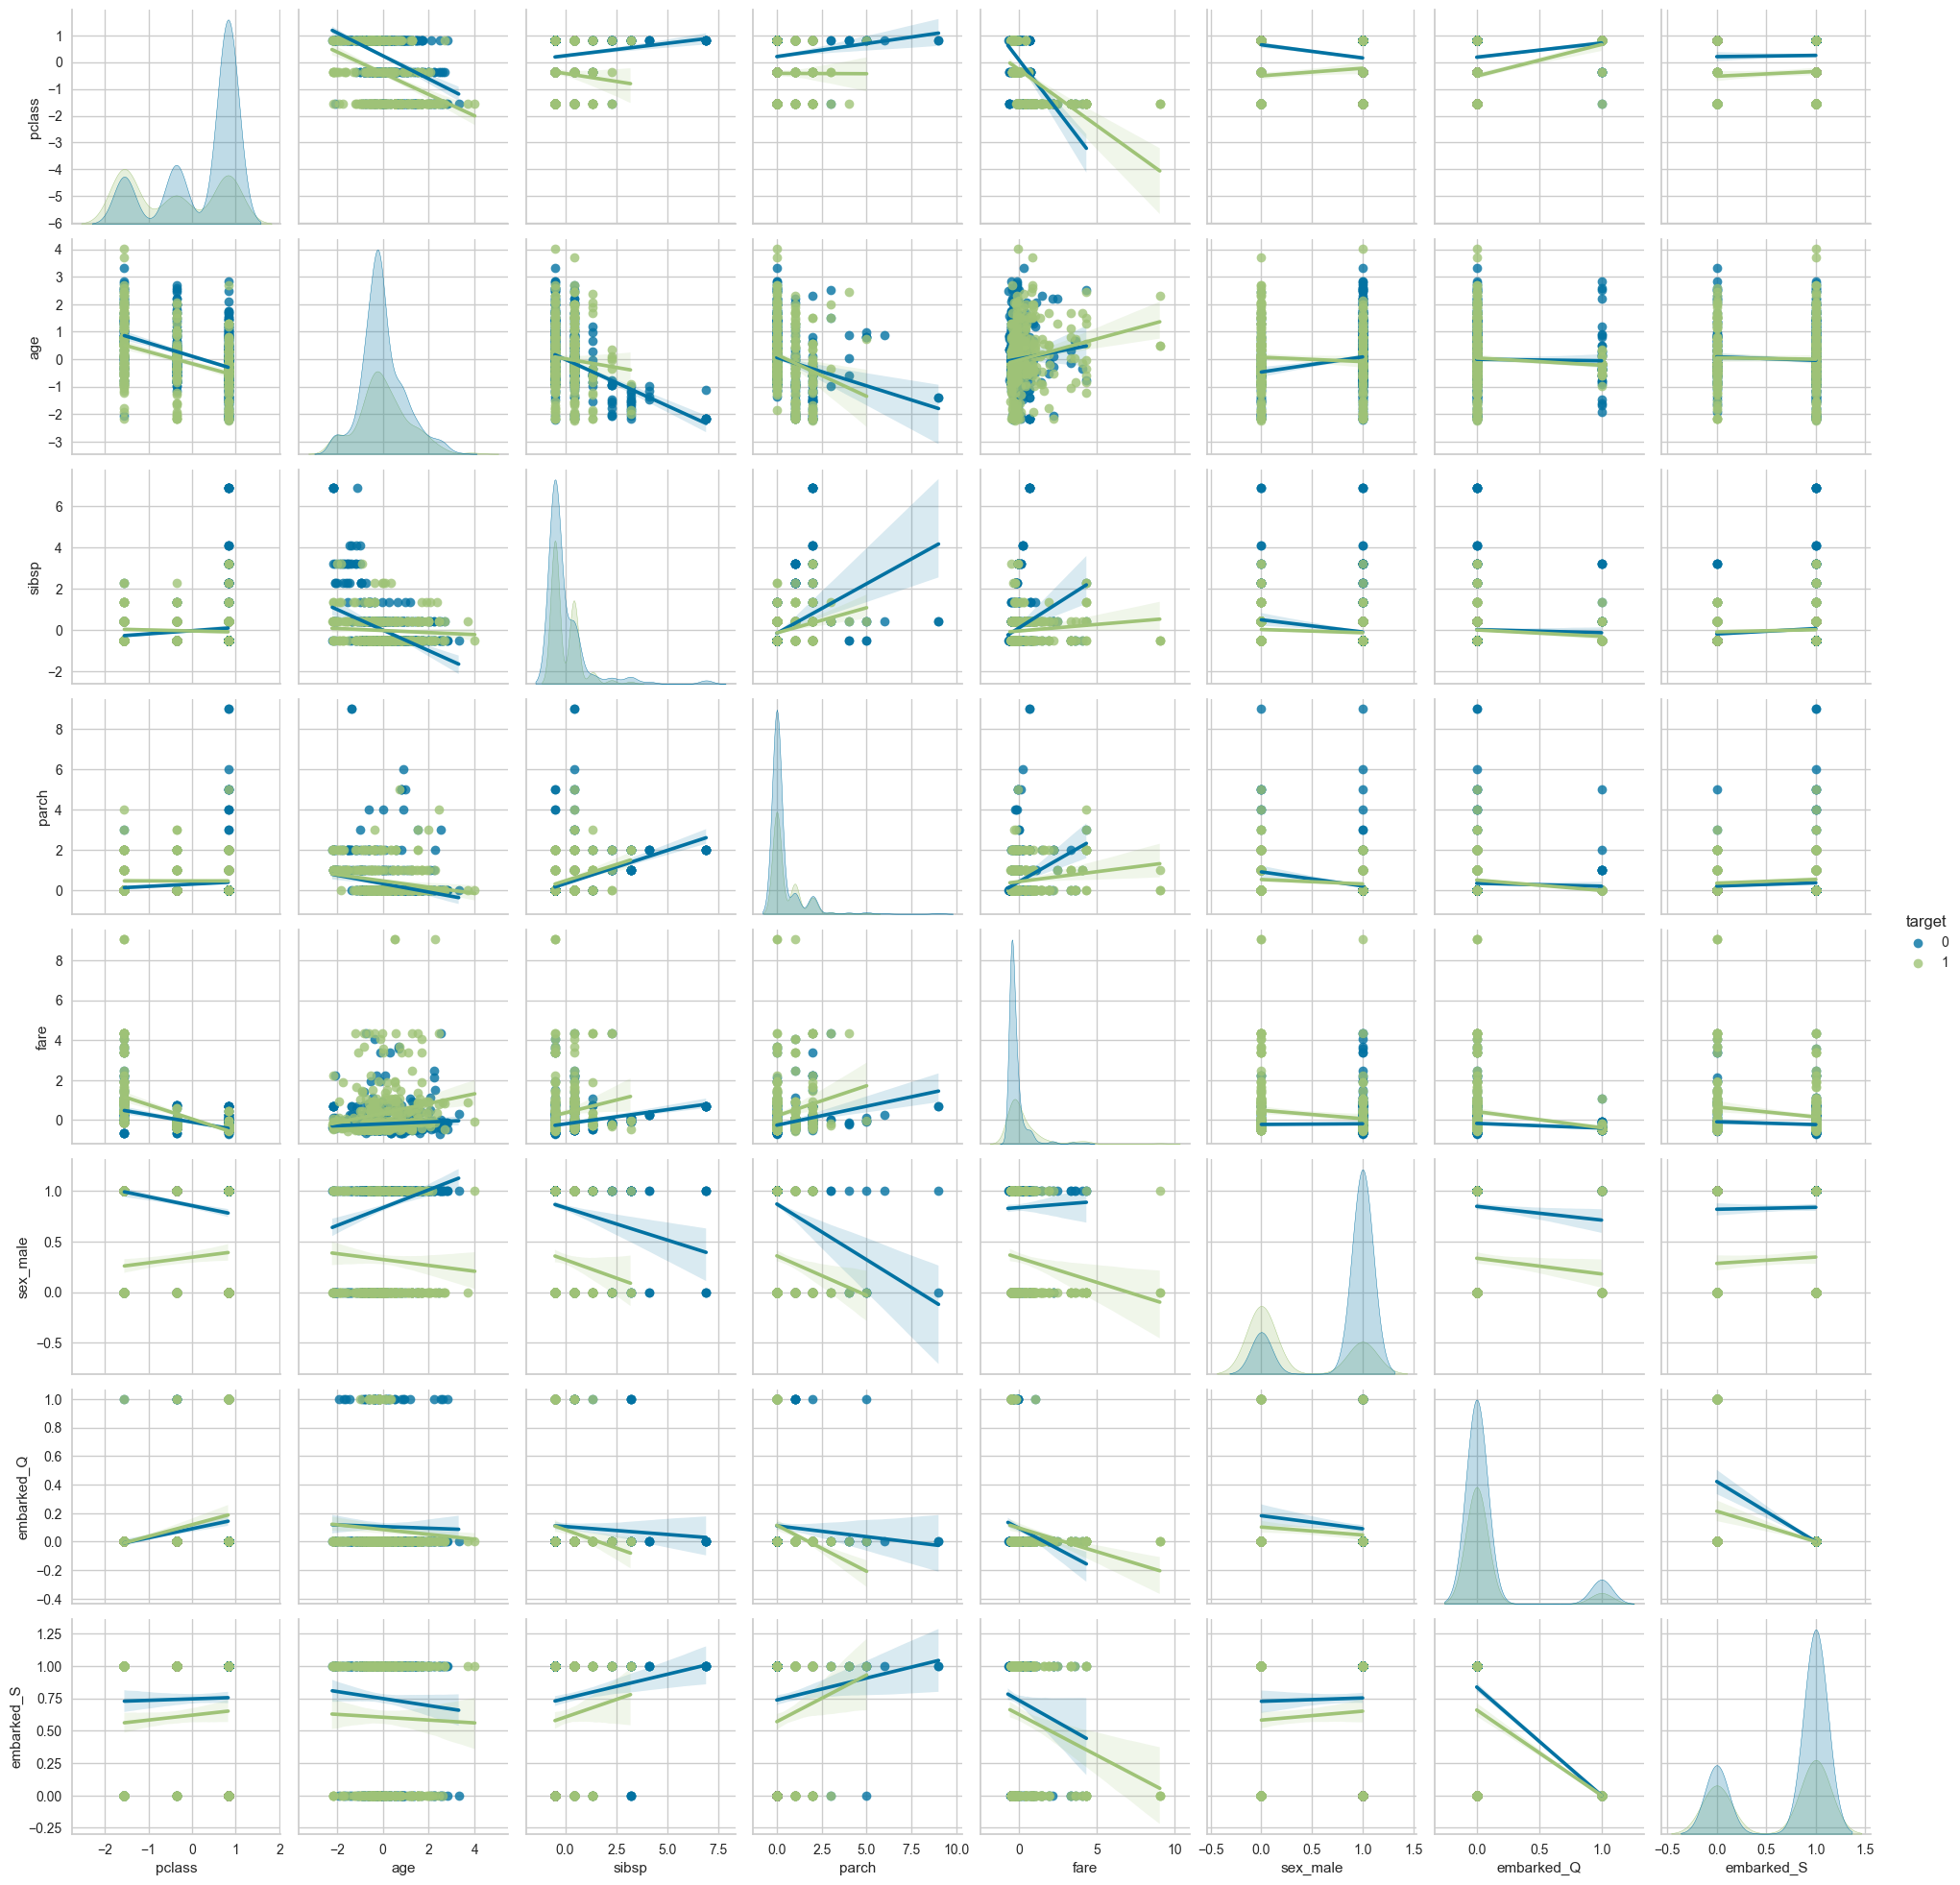

In [151]:
import seaborn as sns

# Combine X_train and y_train into a single DataFrame for visualization
df_combined = pd.concat([X_train, pd.Series(y_train, name="target")], axis=1)

# Check for NaN values in df_combined
if df_combined.isnull().values.any():
    print("Warning: NaN values found in df_combined. Handle missing values before using pairplot.")
else:
    sns.pairplot(df_combined, hue="target", kind="reg")
    plt.show()


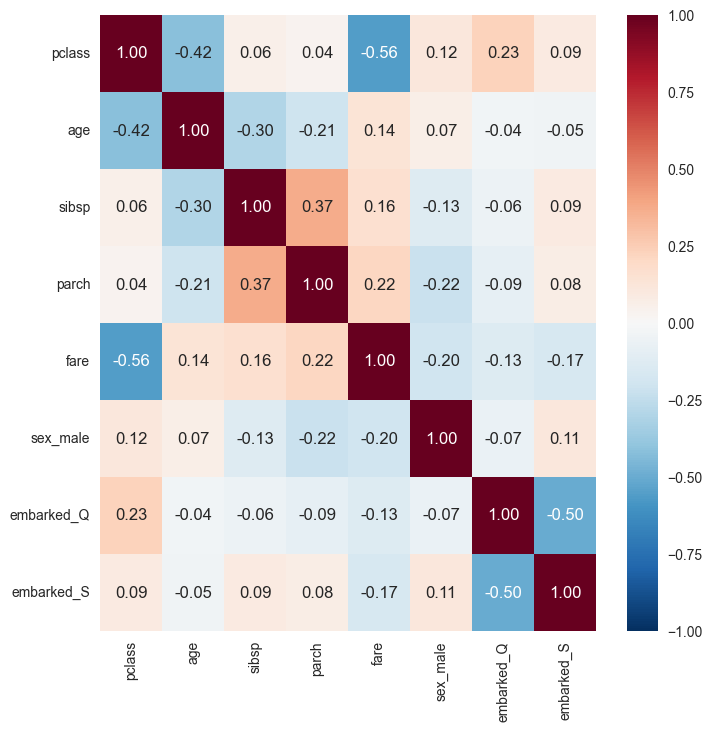

In [152]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    X_train.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    )

*La biblioteca pandas también puede proporcionar una correlación entre Columnas del marco de datos. Sólo mostramos las dos primeras columnas de el resultado. El método predeterminado es 'pearson', pero también puedes establezca el parámetro del método en 'kendall', 'spearman' o un personalizado invocable que devuelve un flotante dadas dos columnas:*

In [153]:
X_train.corr().iloc[:, :8]

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
pclass,1.000000,-0.420072,0.061178,0.038908,-0.555840,0.116803,0.228813,0.093071
age,-0.420072,1.000000,-0.302751,-0.206507,0.135639,0.069919,-0.036099,-0.045879
sibsp,0.061178,-0.302751,1.000000,0.367258,0.158344,-0.129337,-0.059468,0.089846
parch,0.038908,-0.206507,0.367258,1.000000,0.215143,-0.224349,-0.089415,0.075575
fare,-0.555840,0.135639,0.158344,0.215143,1.000000,-0.197320,-0.132872,-0.169740
sex_male,0.116803,0.069919,-0.129337,-0.224349,-0.197320,1.000000,-0.070312,0.112576
embarked_Q,0.228813,-0.036099,-0.059468,-0.089415,-0.132872,-0.070312,1.000000,-0.500057
embarked_S,0.093071,-0.045879,0.089846,0.075575,-0.169740,0.112576,-0.500057,1.000000


# RadViz

El gráfico RadViz muestra cada muestra en un círculo, con las características
en la circunferencia (ver Figura 6-12). Los valores están normalizados,
y puedes imaginar que cada figura tiene un resorte que
extrae muestras según el valor.
Esta es una técnica para visualizar la separabilidad entre los
objetivos.
Yellowbrick puede hacer esto:
informacion de esta biblioteca="https://www.scikit-yb.org/en/latest/api/features/radviz.html"

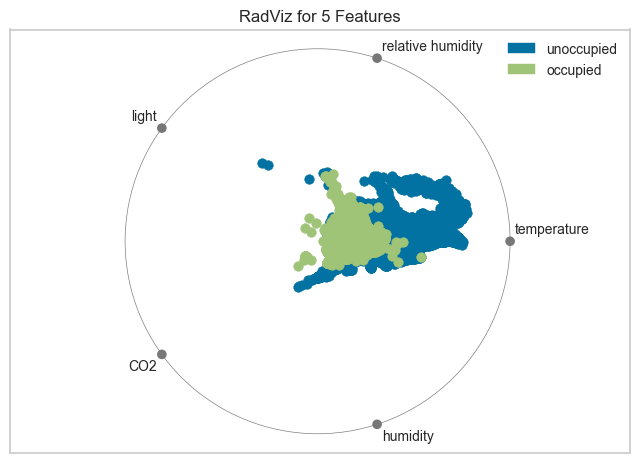

<Axes: title={'center': 'RadViz for 5 Features'}>

In [10]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Parallel Coordinates

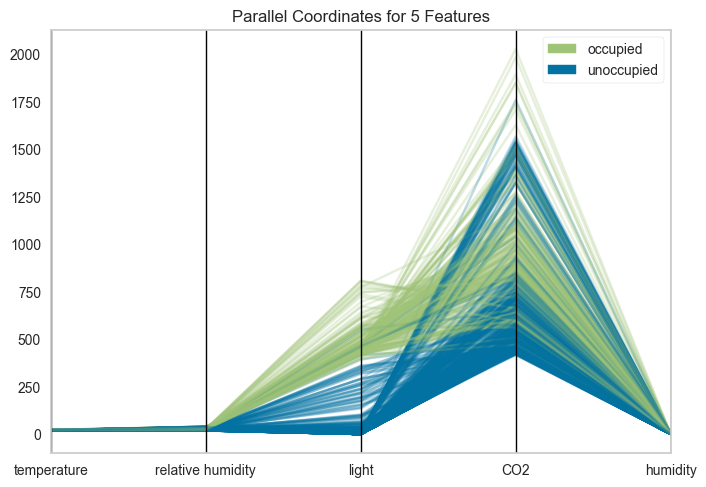

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [9]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show()